In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/shearing/"
print("data path: ", data_path)

level: level2 & tutorial name: nanosheared-electrolyte
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/nanosheared-electrolyte/shearing/


In [3]:
_, z, _, density_water, velocity_water = np.loadtxt(data_path + "water.profile_1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt(data_path + "wall.profile_1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt(data_path + "ions.profile_1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

hs = 1.8e-9 # m
zs = np.arange(-hs/2, hs/2, hs/1000) # m
vs = zs * 20*2/hs

In [4]:
v_wall = np.mean(velocity_solid[(density_solid>0) & (z>0)])
z0 = np.linspace(np.min(z[(density_solid>0) & (z>0)]), np.max(z[(density_solid>0) & (z>0)]), 10)

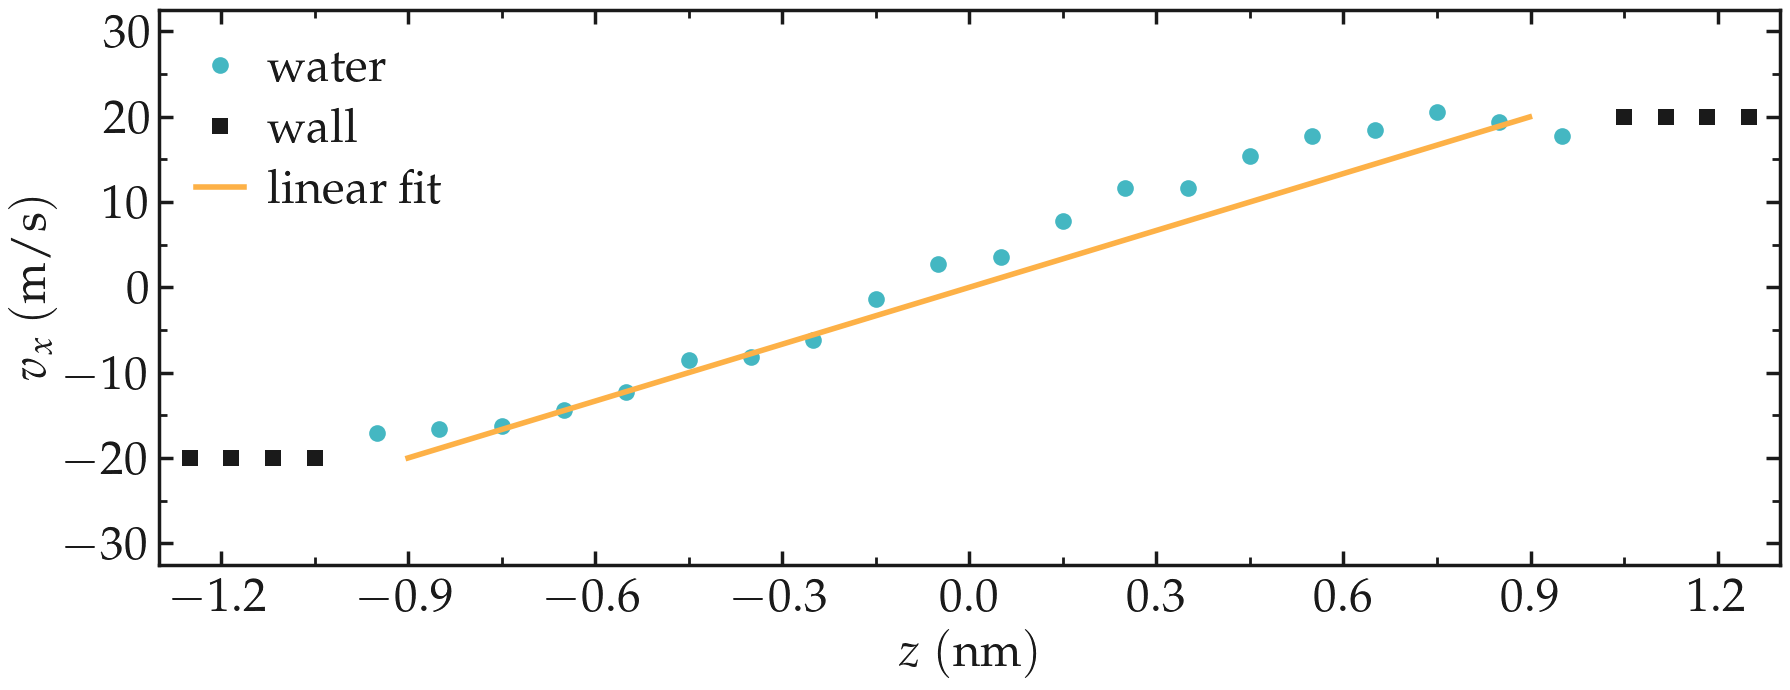

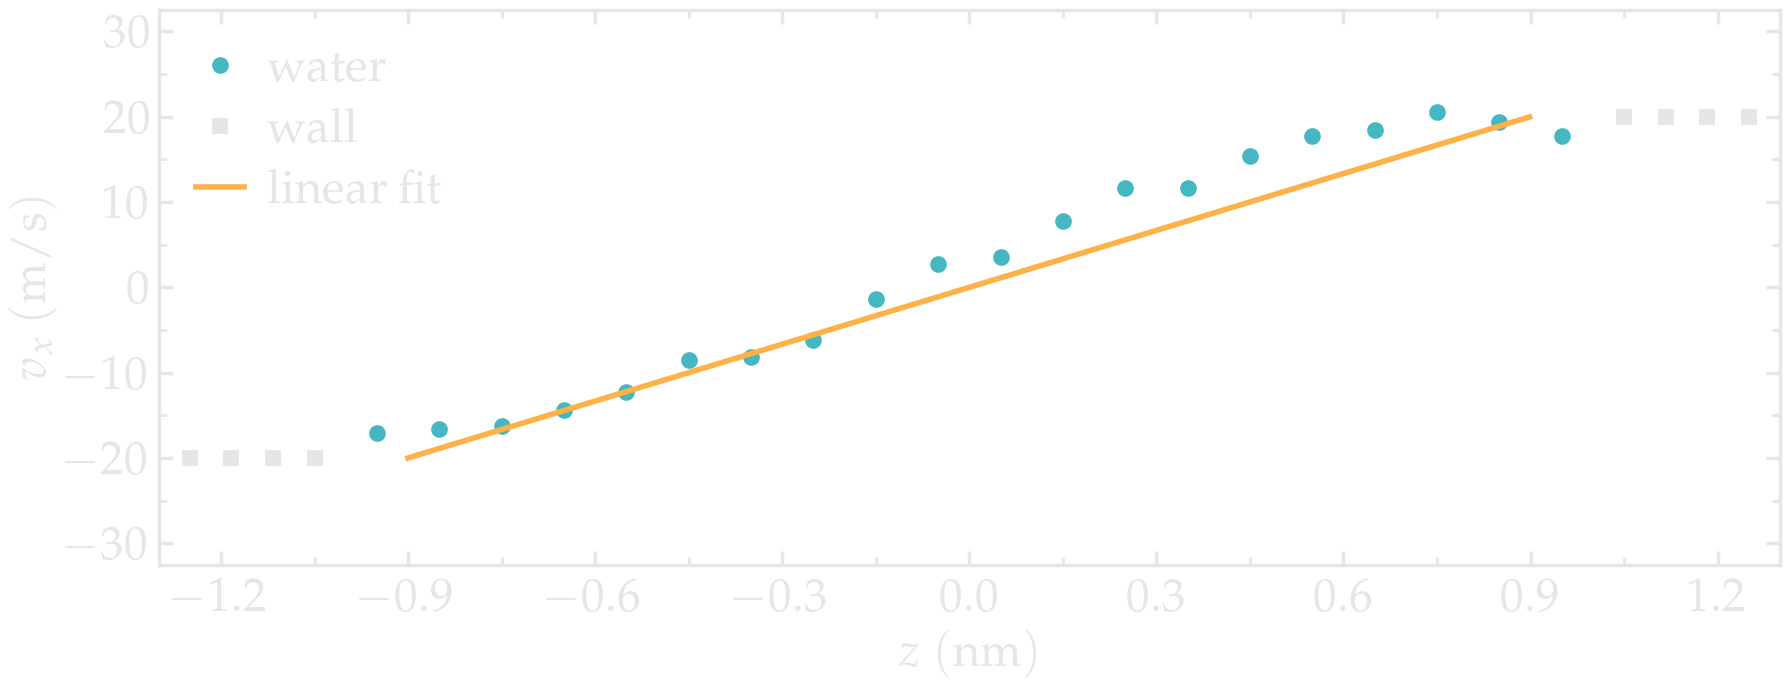

In [5]:
filename = "shearing"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=1)
    myplt.add_panel()
    myplt.add_plot(x = z[density_water>0.02], y = velocity_water[density_water>0.02], linewidth_data = 3,
                   marker = "o", data_color = 0, markersize = 12, data_label=r'$\mathrm{water}$')
    myplt.add_plot(x = z0, y = z0*0+v_wall, linewidth_data = 3,
                   marker = "s", data_color = "autogray", markersize = 12, data_label=r'$\mathrm{wall}$')
    myplt.add_plot(x = -z0, y = z0*0-v_wall, linewidth_data = 3,
                   marker = "s", data_color = "autogray", markersize = 12)
    myplt.add_plot(x = zs*1e9, y = vs, linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12, data_label=r'$\mathrm{linear~fit}$')
    myplt.complete_panel(ylabel = r'$v_x ~ \mathrm{(m/s)}$', xlabel = r'$z ~ \mathrm{(nm)}$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                   y_ticks=np.arange(-30, 40, 10), y_boundaries=(-32.5, 32.5))
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

In [6]:
_, z, _, density_water, velocity_water = np.loadtxt(data_path + "water.profile_0.1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt(data_path + "wall.profile_0.1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt(data_path + "ions.profile_0.1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

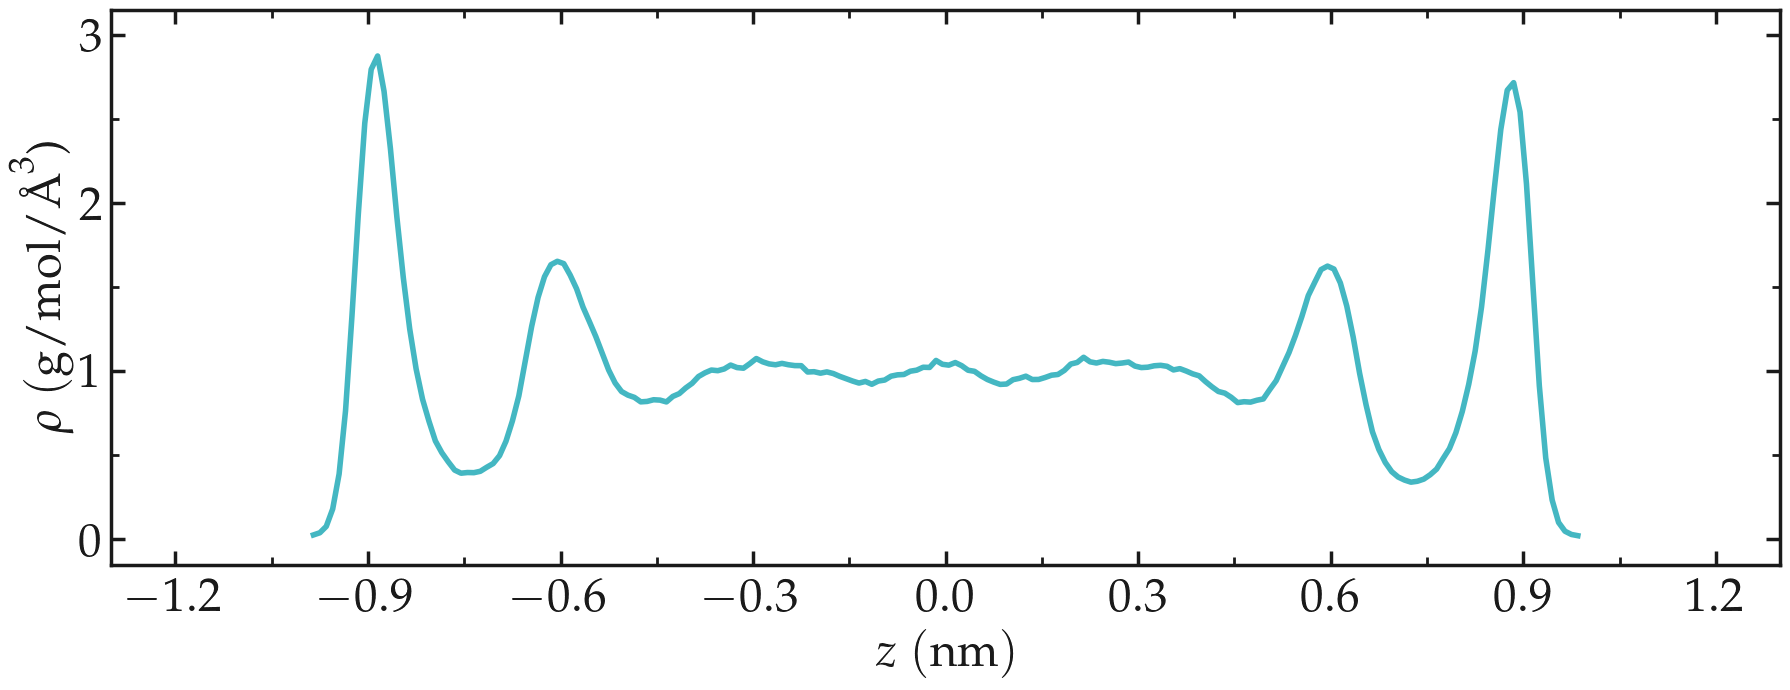

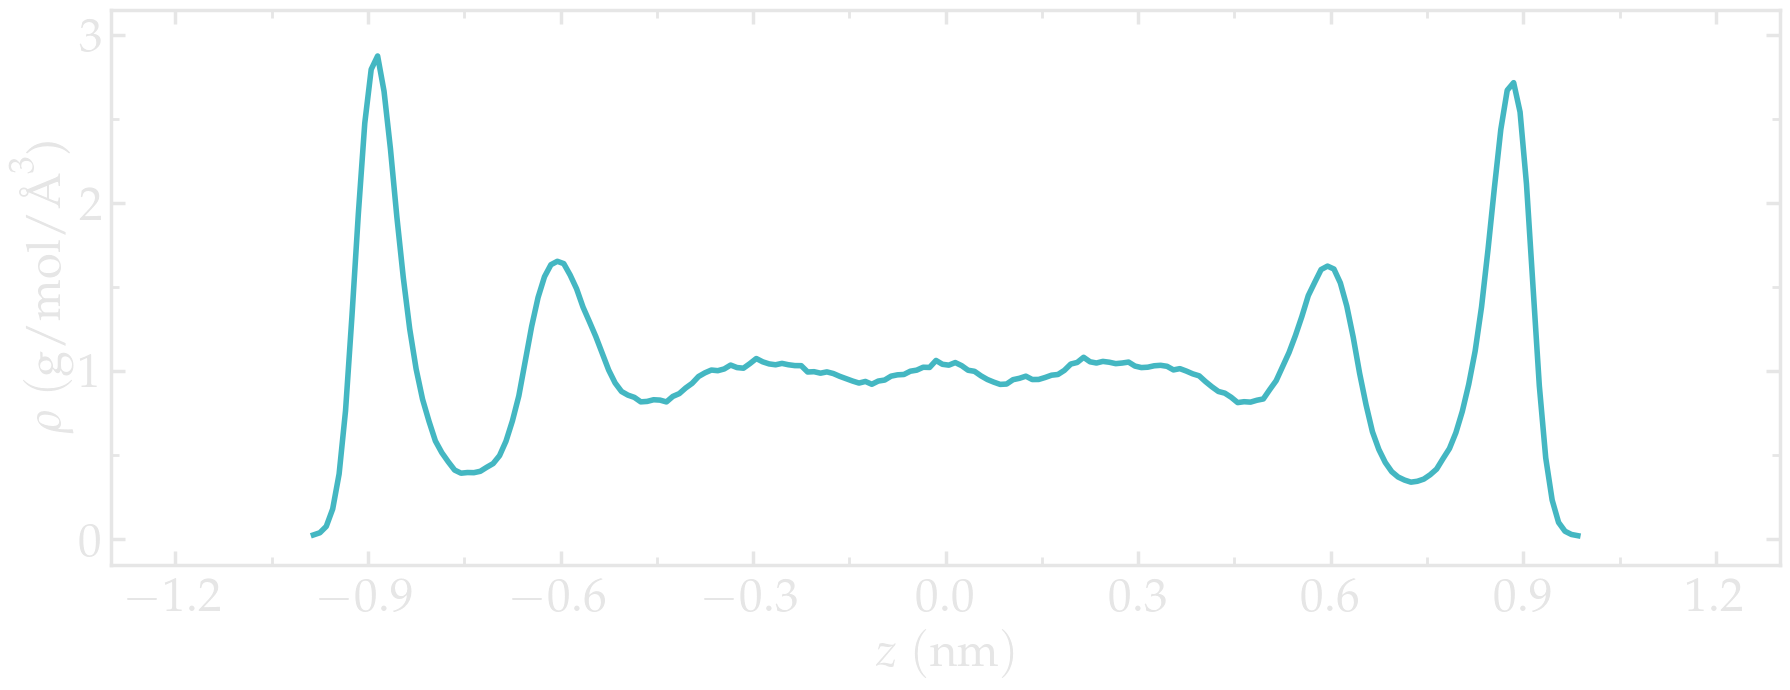

In [7]:
filename = "density"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=1)
    myplt.add_panel()
    myplt.add_plot(x = z[density_water>0.02], y = density_water[density_water>0.02], linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12, data_label=r'$\mathrm{water}$')
    myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{g/mol/\AA}^3$)', xlabel = r'$z ~ \mathrm{(nm)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                y_ticks=np.arange(0, 3.1, 1), y_boundaries=(-0.15, 3.15))
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

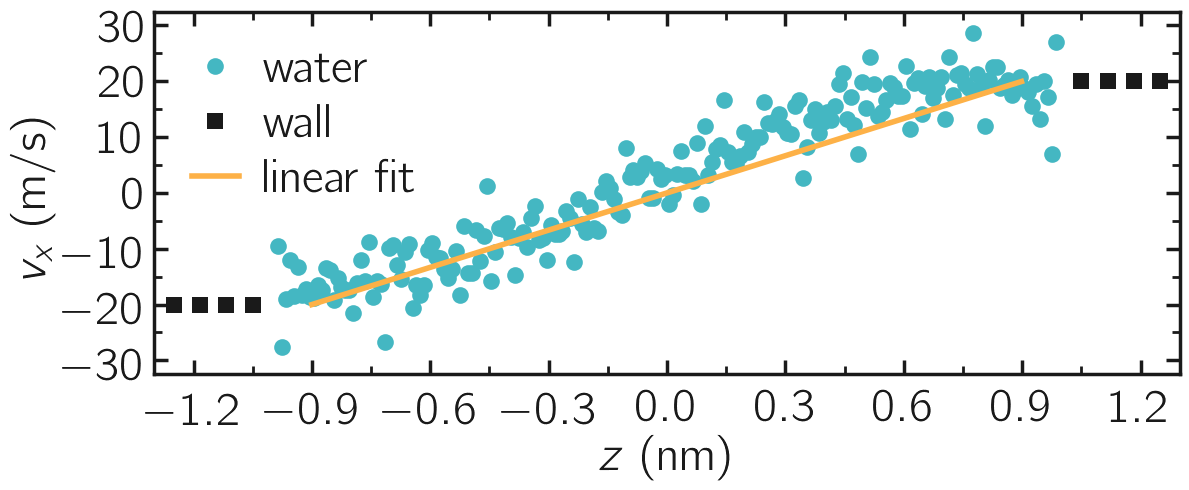

In [22]:
filename = "velocity-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                    transparency = False, use_serif=False, n_line=1)
myplt.add_panel()
myplt.add_plot(x = z[density_water>0.02], y = velocity_water[density_water>0.02], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12, data_label=r'$\mathrm{water}$')
myplt.add_plot(x = z0, y = z0*0+v_wall, linewidth_data = 3,
                marker = "s", data_color = "autogray", markersize = 12, data_label=r'$\mathrm{wall}$')
myplt.add_plot(x = -z0, y = z0*0-v_wall, linewidth_data = 3,
                marker = "s", data_color = "autogray", markersize = 12)
myplt.add_plot(x = zs*1e9, y = vs, linewidth_data = 3,
                marker = "-", data_color = 1, markersize = 12, data_label=r'$\mathrm{linear~fit}$')
myplt.complete_panel(ylabel = r'$v_x ~ \mathrm{(m/s)}$', xlabel = r'$z ~ \mathrm{(nm)}$',
                        xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                y_ticks=np.arange(-30, 40, 10), y_boundaries=(-32.5, 32.5))
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')

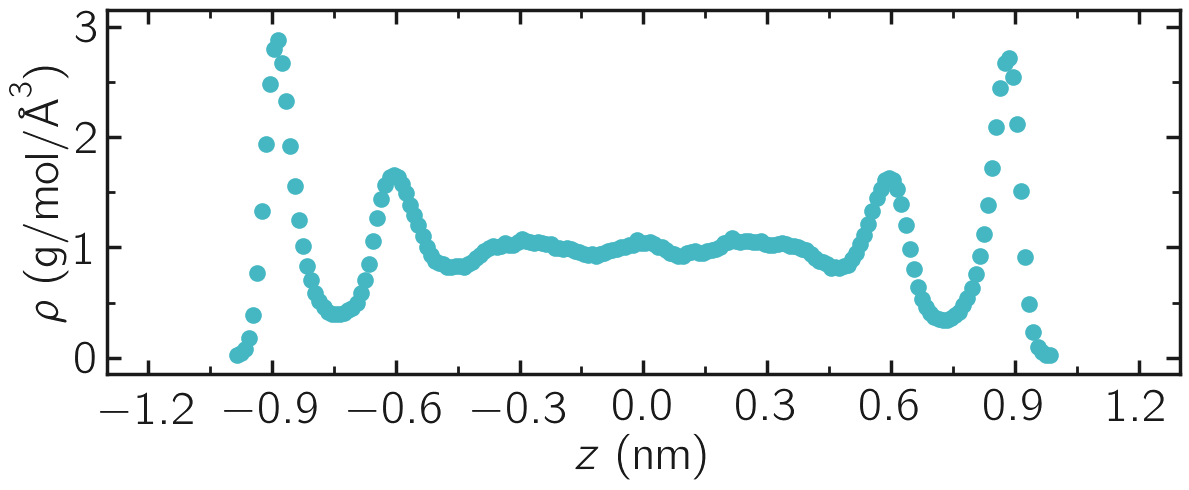

In [24]:
filename = "density-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                    transparency = False, use_serif=False, n_line=1)
myplt.add_panel()
myplt.add_plot(x = z[density_water>0.02], y = density_water[density_water>0.02], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12, data_label=r'$\mathrm{water}$')
myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{g/mol/\AA}^3$)', xlabel = r'$z ~ \mathrm{(nm)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
            y_ticks=np.arange(0, 3.1, 1), y_boundaries=(-0.15, 3.15))
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')